In [82]:
import requests
import urllib
import json
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow

In [83]:
key = "db5c00dc1fce45c49049bff225a0fea6"

In [202]:
# url_cctv = f'https://openapi.its.go.kr:9443/cctvInfo?apiKey={key}&type=ex&cctvType=1&minX=126.756&maxX=126.7936&minY=37.48135&maxY=37.5843&getType=json'
# url_cctv = f"https://openapi.its.go.kr:9443/cctvInfo?apiKey={key}&type=its&cctvType=1&minX=126.5&maxX=127.5&minY=37.0&maxY=38.0&getType=json"
# url_cctv = f"https://openapi.its.go.kr:9443/cctvInfo?apiKey={key}&type=its&cctvType=1&minX=126.7&maxX=127.2&minY=37.3&maxY=37.7&getType=json"

# 서울 종로 중심(위도 경도 설정)
# url_cctv = f"https://openapi.its.go.kr:9443/cctvInfo?apiKey={key}&type=its&cctvType=1&minX=120.95&maxX=127.02&minY=30.55&maxY=37.60&getType=json"

# url_cctv = f"https://openapi.its.go.kr:9443/cctvInfo?apiKey={key}&type=its&cctvType=1&minX=126.8&maxX=127.2&minY=37.4&maxY=37.7&getType=json"
url_cctv = f"https://openapi.its.go.kr:9443/cctvInfo?apiKey={key}&type=&cctvType=1&minX=126.8&maxX=127.2&minY=37.4&maxY=37.7&getType=json"

In [203]:
response = urllib.request.urlopen(url_cctv)

In [204]:
json_str = response.read().decode("utf-8")

In [205]:
json_object = json.loads(json_str)

In [206]:
cctv_play = pd.json_normalize(json_object["response"]["data"], sep=',')

In [207]:
# 길이 ... 제한 해제
pd.set_option("display.max_rows", None)  # 모든 행 출력
pd.set_option("display.max_colwidth", None)  # 긴 문자열도 잘리지 않게 설정

In [208]:
# CCTV 링크 확인
print(cctv_play["cctvurl"])

0                              http://cctvsec.ktict.co.kr/1/jdwUt4iAo55wIajYtgzWV88UFpxrQXpYuUCvRVl6DotN1iMSNAEs7YmkWujEZUCytifHkLNfooiH2plgr4mMCA==
1                              http://cctvsec.ktict.co.kr/2/bP55uGv8dXrSjI3BDpLHfqyAiQdmFl7zt6mF8uDRfhhXeIiwErpKdNf8UOWk9kD6O3aoyKHUAHR+scQf6CVZ6A==
2                              http://cctvsec.ktict.co.kr/3/IkZYyFT+GD0UfMeDd2OPX/i0FY7cEzWdfaof5UNW2jBf9raszHSG7r+Svah99V5EHcWe/oCmojkryRAlpR1f1g==
3                              http://cctvsec.ktict.co.kr/4/LUIVbNjovc/0OBpX7AgnzhPUzxvzLfPhyV2m+DPo0z6RGEV8E3JWDgJXz4uXREq/Nmx8moY698u4ZSFucbF6oQ==
4                              http://cctvsec.ktict.co.kr/5/fGgLrhVeTYmx9etjJKKgwxw8bYBVCJ9YW10qY7EF5IO3eEdWyF8wGTTcxYnh+yYosn3hbPsCTMfhm9jN26SCbg==
5                              http://cctvsec.ktict.co.kr/6/gAbwNRH0/dSkHrsLHNSf/4Fl1JePGJYlrGuFE5OaXJKbQemcJ1uboQLTcIdSw4g6ReGAhPi+DMgqDIhx9CETyw==
6                              http://cctvsec.ktict.co.kr/7/WAcOBx6xHTIINsHLTZe06WEUk08Ls000C6umHDXxLIQe7E

In [209]:
# CCTV 설치명 확인
print(cctv_play["cctvname"])

0                       [수도권제1순환선] 판교분기점
1                          [수도권제1순환선] 성남
2                       [수도권제1순환선] 성남요금소
3                          [수도권제1순환선] 송파
4                        [수도권제1순환선] 서하남2
5                       [수도권제1순환선] 광암터널2
6                       [수도권제1순환선] 광암터널3
7                       [수도권제1순환선] 하남분기점
8                          [수도권제1순환선] 상일
9                          [수도권제1순환선] 강일
10                         [수도권제1순환선] 토평
11                        [수도권제1순환선] 남양주
12                        [수도권제1순환선] 퇴계원
13                         [수도권제1순환선] 구리
14                      [수도권제1순환선] 안현분기점
15                            [제2경인선] 광명
16                             [서해안선] 금천
17                          [서해안선] 금천고가교
18                          [서해안선] 일직분기점
19                            [서해안선] 광명역
20                              [경인선] 신월
21                         [수도권제1순환선] 일산
22                             [경부선] 상적교
23                           [경부선] 판교분기점
24              

In [210]:
test_url = cctv_play["cctvurl"][132]

In [211]:
cap = cv2.VideoCapture(test_url)

In [212]:
# while cap.isOpened():
#   success, frame = cap.read()
#   if not success:
#     print("Frame Check, Plz")
#     break
#   frame = cv2.cvtColor(frame, cv2.IMREAD_COLOR)
#   cv2.imshow("ITS_CCTV", frame)
#   if cv2.waitKey(1) & 0xFF == ord('q'):
#     break

# cap.release()
# cv2.destroyAllWindows()

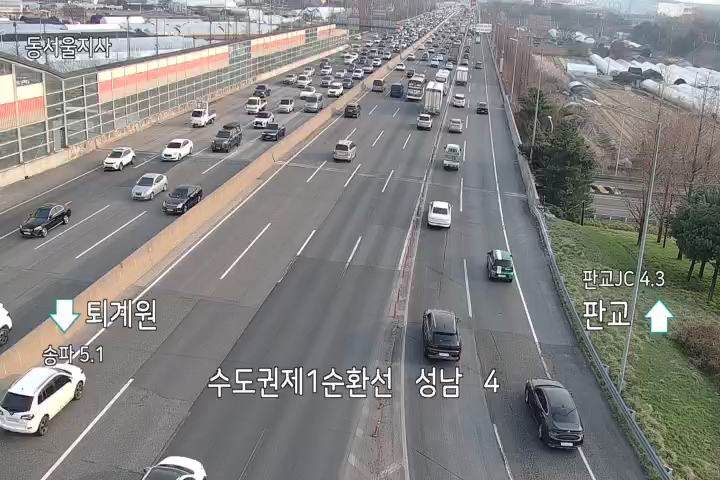

In [213]:
cap = cv2.VideoCapture(cctv_play["cctvurl"][1])  # CCTV 스트림 URL 입력

ret, frame = cap.read()
if ret:
    cv2_imshow(frame)  # 첫 프레임 출력
else:
    print("프레임을 가져올 수 없습니다.")

cap.release()

In [214]:
# url 정보 확인
url_cctv = f"https://openapi.its.go.kr:9443/cctvInfo?apiKey={key}&type=its&cctvType=1&minX=126.5&maxX=127.5&minY=37.0&maxY=38.0&getType=json"

response = requests.get(url_cctv)
if response.status_code == 200:
    data = response.json()
    print(data)  # API 응답 확인
else:
    print(f"API 요청 실패: {response.status_code}")

{'response': {'coordtype': 1, 'data': [{'roadsectionid': '', 'coordx': 126.7516, 'coordy': 37.8943638, 'cctvresolution': '', 'filecreatetime': '', 'cctvtype': 1, 'cctvformat': 'HLS', 'cctvname': '[국도 1호선] 파주 자유IC', 'cctvurl': 'http://cctvsec.ktict.co.kr/4003/54FS6gZieMORXoYIEMYoxXsYWmVjuEQyQyTxX2TQFRhfosk4T8FGJYAH8ZblAo72HcxxVNdVqd7Q71jCyf5HVfyHPEkalaVHsLt6ncup/9A='}, {'roadsectionid': '', 'coordx': 126.7884694, 'coordy': 37.8483361, 'cctvresolution': '', 'filecreatetime': '', 'cctvtype': 1, 'cctvformat': 'HLS', 'cctvname': '[국도1호선] 파주 통일공원앞', 'cctvurl': 'http://cctvsec.ktict.co.kr/4004/ZOBp1U3QarB57C8E1kWeh78efX7soD87II4Ye3hyiV6ke1/x0xea7JJhM0VI0lZ4WbNcWz/UWtOC9QuX90McdObHR1CuxJ1JBM+ecJNXT+g='}, {'roadsectionid': '', 'coordx': 126.7875222, 'coordy': 37.8732194, 'cctvresolution': '', 'filecreatetime': '', 'cctvtype': 1, 'cctvformat': 'HLS', 'cctvname': '[국도1호선] 파주 여우고개사거리', 'cctvurl': 'http://cctvsec.ktict.co.kr/4010/Wr4EMTtUNGXGoWW9Ir3pUuOMaM5eCvnrxfZmGNMN+6OdDcekrpOtg2EAQMqvWTq7UlNSo